In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [36]:
filename = ['1.csv', '2.csv', '3.csv', '4.csv', '5.csv']
exec_time_dfs = []
for i, name in enumerate(filename):
    exec_time_df = pd.read_csv("../" + name)
    not_arr = [0, 210, 215, 220, 225, 230, 235, 236,240, 242, 245, 248, 249, 250, 252]
    exec_time_df = exec_time_df[~exec_time_df['prio'].isin(not_arr)]
    exec_time_df.sort_values(by='prio', inplace=True)
    exec_time_dfs.append(exec_time_df)
prios = exec_time_dfs[0]['prio'].drop_duplicates()
prios = np.array(prios)
prios

array([  3,   6,   9,  11,  12,  15,  18,  21,  24,  27,  30,  36,  39,
        41,  45,  48,  51,  54,  57,  60,  63,  66,  69,  70,  72,  75,
        78,  81,  84,  87,  90,  96,  99, 105, 108, 111, 114, 117, 120,
       123, 126, 180, 200, 205, 253])

In [37]:
hm_dfs = []
for i in range(len(filename)):
    hm_df = exec_time_dfs[i][exec_time_dfs[i]['tm'].isin(['hit', 'miss'])]
    hm_dfs.append(hm_df)
hm_dfs[0]

,prio,tm,tick
1053528,6,hit,39159
2927068,6,hit,43254
2922304,6,hit,43078
1062316,6,hit,39484
2923876,6,hit,43136
...,...,...,...
2904172,253,hit,42401
1549838,253,hit,57601
1646702,253,hit,61201
172216,253,hit,6401


In [38]:
tm_dfs = []
for i in range(len(filename)):
    tm_df = exec_time_dfs[i][~exec_time_dfs[i]['tm'].isin(['hit', 'miss'])]
    tm_df['tm'] = tm_df['tm'].astype(int)
    tm_dfs.append(copy.deepcopy(tm_df))

/tmp/ipykernel_637/1109762974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tm_df['tm'] = tm_df['tm'].astype(int)


In [39]:
# threshold = [535, 2063, 406, 541, 580, 495, 873, 524, 178, 716, 208, 449, 468, 534, 536, 1607, 1330, 1074, 354, 231, 477, 378, 542, 280, 146, 348, 378, 274, 251, 532, 720, 521, 151, 2, 513, 286, 72, 278, 276, 355, 455,312, 200, 826, 3593]
periods = [20000, 2500, 20000, 5000, 2500, 2500, 20000, 100000, 20000, 20000, 50000, 20000, 100000, 100000, 100000, 100000, 2500, 2500, 142857, 100000, 100000, 20000, 100000, 2500, 100000, 20000, 20000, 100000, 100000, 100000, 333333, 1000000, 333333, 10000000, 20000, 2500, 10000000, 200000, 1000000, 100000, 20000, 20000, 20000, 2500, 1000000]

In [40]:
len(periods)

45

In [41]:
len(prios)

45

In [42]:
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[2][hm_dfs[2]['prio'] == prio]
    hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())
    print(prio, hit_rate)


/tmp/ipykernel_637/216598118.py:3: RuntimeWarning: invalid value encountered in long_scalars
  hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())


3 nan
6 0.9991625849265287
9 1.0
11 1.0
12 0.9998814959945647
15 0.9998893962615937
18 1.0
21 1.0
24 1.0
27 1.0
30 1.0
36 1.0
39 1.0
41 1.0
45 1.0
48 1.0
51 0.9998893962615937
54 0.9999288975967388
57 1.0
60 1.0
63 1.0
66 1.0
69 1.0
70 0.999976299198913
72 1.0
75 1.0
78 1.0
81 1.0
84 1.0
87 1.0
90 1.0
96 1.0
99 1.0
105 1.0
108 1.0
111 0.9999288975967388
114 1.0
117 1.0
120 1.0
123 1.0
126 1.0
180 1.0
200 1.0
205 0.9999130970626807
253 1.0


In [43]:
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[1][hm_dfs[1]['prio'] == prio]
    hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())
    print(prio, hit_rate)


3 nan
6 0.998911759218954
9 1.0
11 1.0
12 0.9998631908860256
15 0.9998694094821153
18 1.0
21 1.0
24 1.0
27 1.0
30 1.0
36 1.0
39 1.0
41 1.0
45 1.0
48 1.0
51 0.9998942838664743
54 0.999900502462564
57 1.0
60 1.0
63 1.0
66 1.0
69 1.0
70 0.9999253768469231
72 1.0
75 1.0


/tmp/ipykernel_637/33834483.py:3: RuntimeWarning: invalid value encountered in long_scalars
  hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())


78 1.0
81 1.0
84 1.0
87 1.0
90 1.0
96 1.0
99 1.0
105 1.0
108 1.0
111 0.9998880652703845
114 1.0
117 1.0
120 1.0
123 1.0
126 1.0
180 1.0
200 1.0
205 0.9999440326351923
253 1.0


In [44]:
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[3][hm_dfs[3]['prio'] == prio]
    hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())
    print(prio, hit_rate)


3 nan
6 0.9991024315944079
9 1.0
11 0.9999728002175983
12 0.9998504032312902
15 0.9999728005875073
18 1.0
21 1.0
24 1.0
27 1.0
30 1.0
36 1.0
39 1.0
41 1.0
45 1.0
48 1.0
51 0.9998912023500293
54 0.9998096041125512
57 1.0
60 1.0
63 1.0
66 1.0
69 1.0
70 0.9999456011750146
72 1.0
75 0.999963732637
78 1.0
81 1.0
84 1.0
87 1.0
90 1.0
96 1.0
99 1.0
105 1.0
108 1.0
111 0.9998640029375365
114 1.0
117 1.0
120 1.0
123 1.0
126 1.0
180 1.0
200 1.0
205 0.9999456011750146
253 1.0


/tmp/ipykernel_637/1471937313.py:3: RuntimeWarning: invalid value encountered in long_scalars
  hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())


In [45]:
def ecdf(data):
    """Compute the empirical cumulative distribution function."""
    sorted_data = np.sort(data)
    n = len(data)
    return sorted_data, np.arange(1, n+1) / n

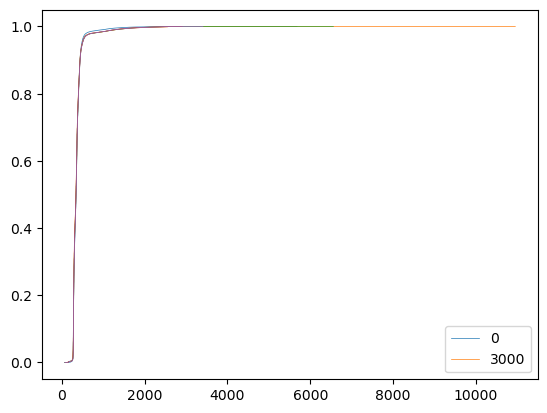

In [46]:
# The cdf for task.prio==6
prio = 6
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.legend([0,3000])


(0.0, 500.0)

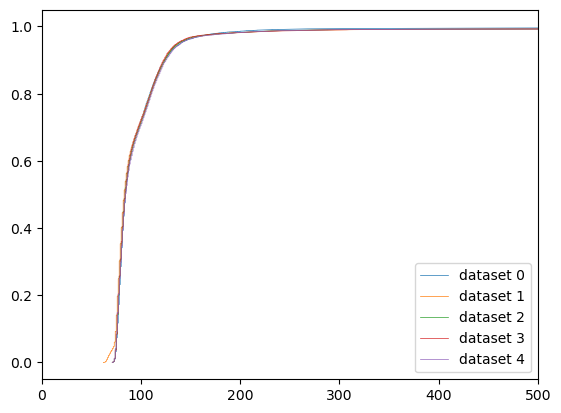

In [47]:
# The cdf for task.prio==6
prio = 9
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.xlim([0,500])


(0.0, 500.0)

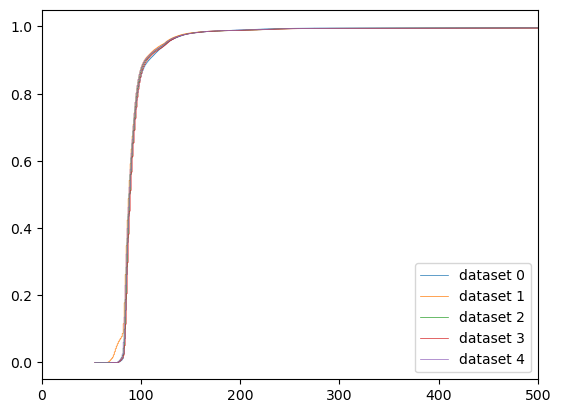

In [48]:
# The cdf for task.prio==6
prio = 51
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.xlim([0,500])


In [49]:
with open("tasks/prios.txt", 'w') as f:
    f.write(f"{prios.tolist()}\n")

In [52]:
pers_idx = np.arange(1, 1001) / 10
for idx, prio in enumerate(prios):
    pers_all = []
    for i in range(len(filename)):
        dfidx = tm_dfs[i][tm_dfs[i]['tm'] < periods[idx]]
        dfidx = dfidx[dfidx['prio'] == prio]['tm'].to_numpy()
        pers = np.percentile(dfidx, pers_idx)
        pers_all.append(pers)
    pers_max = np.max(np.array(pers_all), axis=0)
    with open(f"tasks/{prio}.txt", 'w') as f:
        f.write(f"{periods[idx]}\n")
        f.write(f"{pers_max.tolist()}")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().